<div>
<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 1: Practical - Linear Regression <br> <br>
<font color=686880 size=4>
    TAs: Arman Malekzadeh - Yalda Shabanzadeh - Arshia Soltani Moakhar
    
____

### Full Name : pardis zahraei
### Student Number : 99109777
___

In [17]:
# run this to download the dataset
!wget -O 'dataset.csv' https://www.dropbox.com/s/2ny75tb1ic141yw/assignment1.csv?dl=0

--2023-03-10 18:56:17--  https://www.dropbox.com/s/2ny75tb1ic141yw/assignment1.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2ny75tb1ic141yw/assignment1.csv [following]
--2023-03-10 18:56:18--  https://www.dropbox.com/s/raw/2ny75tb1ic141yw/assignment1.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc247d617e11205b67c5505547b1.dl.dropboxusercontent.com/cd/0/inline/B3-DRvORFqAGX5jAJYgoQfQUkm9B9u6xFxuZ67ZTm-MFr5dL-Hdcq92ZvbZJdmKN4WIRcJW37R5zlItNi2-HjBg0gTbflGvrcl8mF1pwPrT3R4ADa-lMau_5vDYyZwPlvKJ3LwtCbuq9VkwVymqxbL4quKhfLlebHAApSCtcIvtPfw/file# [following]
--2023-03-10 18:56:18--  https://uc247d617e11205b67c5505547b1.dl.dropboxusercontent.com/cd/0/inline/B3-DRvORFqAGX5jAJYgoQfQUkm9B9u6xFxuZ67ZTm-MFr5dL-Hdcq92ZvbZJdmKN

In [18]:
# you can use the following libraries
import pandas
import sklearn
import numpy as np
from joblib import dump, load
from matplotlib import pyplot as plt
import os

# Phase 1: Explore

## Sec 1: What do we have here?

load the dataset (as a dataframe) using pandas

In [19]:
dataframe = pandas.read_csv("dataset.csv")
dataframe 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


display the top rows of the dataframe (top 5 is enough)

In [ ]:

dataframe.head(5)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


print the names of the columns

In [ ]:
print(dataframe.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


what values can the `region` column take? print the unique values using pandas

In [ ]:
print(dataframe['region'].unique())

['southwest' 'southeast' 'northwest' 'northeast']


get the number of rows in the dataset

In [ ]:
print(len(dataframe))

1338


make a new column named `rounded_bmi` by rounding each value of the column `bmi` | keep the `bmi` column

In [ ]:
dataframe['rounded_bmi'] = dataframe['bmi'].round()
dataframe

,age,sex,bmi,children,smoker,region,charges,rounded_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,28.0
1,18,male,33.770,1,no,southeast,1725.55230,34.0
2,28,male,33.000,3,no,southeast,4449.46200,33.0
3,33,male,22.705,0,no,northwest,21984.47061,23.0
4,32,male,28.880,0,no,northwest,3866.85520,29.0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,31.0
1334,18,female,31.920,0,no,northeast,2205.98080,32.0
1335,18,female,36.850,0,no,southeast,1629.83350,37.0
1336,21,female,25.800,0,no,southwest,2007.94500,26.0


## Sec 2: Perform EDA

perform EDA on the dataset (e.g., see if there are null values)

In [ ]:

dataframe.info()

dataframe.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   charges      1338 non-null   float64
 7   rounded_bmi  1338 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 83.8+ KB


,age,bmi,children,charges,rounded_bmi
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,30.663677
std,14.049960,6.098187,1.205493,12110.011237,6.096007
min,18.000000,15.960000,0.000000,1121.873900,16.000000
25%,27.000000,26.296250,0.000000,4740.287150,26.000000
50%,39.000000,30.400000,1.000000,9382.033000,30.000000
75%,51.000000,34.693750,2.000000,16639.912515,35.000000
max,64.000000,53.130000,5.000000,63770.428010,53.000000


In [ ]:
dataframe.duplicated().sum()

1

In [ ]:

dataframe.isnull().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
charges        0
rounded_bmi    0
dtype: int64

In [21]:
# as we can see this dataset dosent have any null value but if we wanted we could use this to remove them

dataframe.replace(np.nan,'0',inplace = True)
dataframe.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


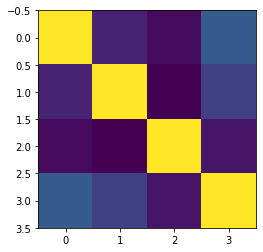

In [22]:
# find Correlation 
print(dataframe.corr())
plt.imshow( dataframe.corr()  , interpolation = 'nearest' )
plt.show()

<AxesSubplot:>

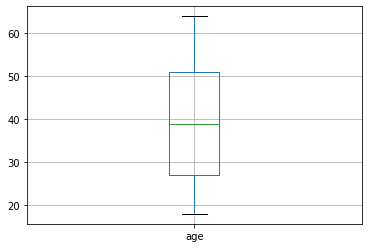

In [ ]:
dataframe.boxplot('age')

<AxesSubplot:>

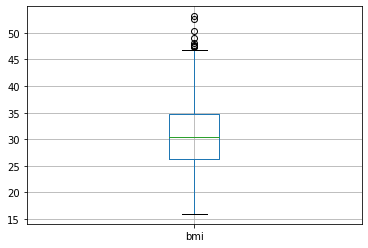

In [ ]:
dataframe.boxplot('bmi')

<AxesSubplot:>

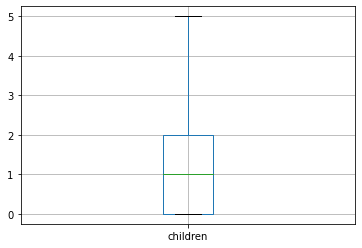

In [ ]:
dataframe.boxplot('children')

<AxesSubplot:>

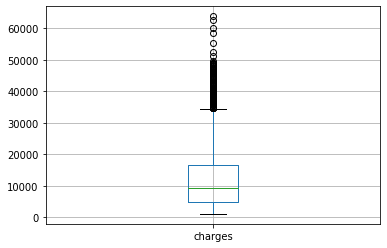

In [ ]:
dataframe.boxplot('charges')

<AxesSubplot:>

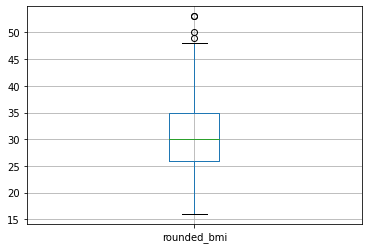

In [ ]:
dataframe.boxplot('rounded_bmi')

In [ ]:
# we need to delete rounded bmi because its highly Correlated
# also we need to delete outlier datas seen in boxplots

## Sec 3: Do linear relationships exist?

plot `age` against `charges` | **hint**: you can use matplotlibs

<AxesSubplot:xlabel='age', ylabel='charges'>

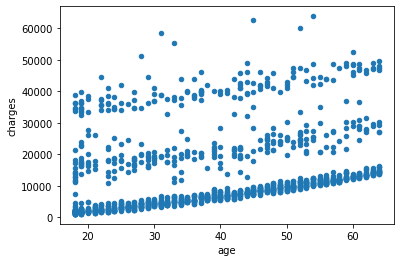

In [ ]:
dataframe.plot(kind='scatter', x='age', y='charges')

print the correlation coefficients matrix

In [ ]:
print(dataframe.corr())

                  age       bmi  children   charges  rounded_bmi
age          1.000000  0.109272  0.042469  0.299008     0.109527
bmi          0.109272  1.000000  0.012759  0.198341     0.998920
children     0.042469  0.012759  1.000000  0.067998     0.013915
charges      0.299008  0.198341  0.067998  1.000000     0.198795
rounded_bmi  0.109527  0.998920  0.013915  0.198795     1.000000


# Phase 2: Preprocessing

## Sec 1: Handling Categorical Variables

using one-hot encoding, convert the `region` variable to some numerical variables (the result should be a dataframe)

In [ ]:
region_encoded = pandas.get_dummies(dataframe['region'], prefix='region')
print(region_encoded)

      region_northeast  region_northwest  region_southeast  region_southwest
0                    0                 0                 0                 1
1                    0                 0                 1                 0
2                    0                 0                 1                 0
3                    0                 1                 0                 0
4                    0                 1                 0                 0
...                ...               ...               ...               ...
1333                 0                 1                 0                 0
1334                 1                 0                 0                 0
1335                 0                 0                 1                 0
1336                 0                 0                 0                 1
1337                 0                 1                 0                 0

[1338 rows x 4 columns]


do the same thing for the `smoker` variable (the result should be a dataframe)

In [ ]:
smoker_encoded = pandas.get_dummies(dataframe['smoker'], prefix='smoker')
print(smoker_encoded)

      smoker_no  smoker_yes
0             0           1
1             1           0
2             1           0
3             1           0
4             1           0
...         ...         ...
1333          1           0
1334          1           0
1335          1           0
1336          1           0
1337          0           1

[1338 rows x 2 columns]


do the same thing for the `sex` variable (the result should be a dataframe)

In [ ]:
sex_encoded = pandas.get_dummies(dataframe['sex'], prefix='sex')
print(sex_encoded)

      sex_female  sex_male
0              1         0
1              0         1
2              0         1
3              0         1
4              0         1
...          ...       ...
1333           0         1
1334           1         0
1335           1         0
1336           1         0
1337           1         0

[1338 rows x 2 columns]


concatenate these new dataframes with the initial one using pandas

In [ ]:
new_dataframe=pandas.concat([dataframe, region_encoded], axis=1)
new_dataframe = pandas.concat([new_dataframe, smoker_encoded], axis=1)
new_dataframe = pandas.concat([new_dataframe, sex_encoded], axis=1)
new_dataframe

,age,sex,bmi,children,smoker,region,charges,rounded_bmi,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,19,female,27.900,0,yes,southwest,16884.92400,28.0,0,0,0,1,0,1,1,0
1,18,male,33.770,1,no,southeast,1725.55230,34.0,0,0,1,0,1,0,0,1
2,28,male,33.000,3,no,southeast,4449.46200,33.0,0,0,1,0,1,0,0,1
3,33,male,22.705,0,no,northwest,21984.47061,23.0,0,1,0,0,1,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,29.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,31.0,0,1,0,0,1,0,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,32.0,1,0,0,0,1,0,1,0
1335,18,female,36.850,0,no,southeast,1629.83350,37.0,0,0,1,0,1,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,26.0,0,0,0,1,1,0,1,0


In [ ]:
new_dataframe.drop(['region'], axis=1, inplace=True)
new_dataframe.drop(['sex'], axis=1, inplace=True)
new_dataframe.drop(['smoker'], axis=1, inplace=True)

In [ ]:
new_dataframe

,age,bmi,children,charges,rounded_bmi,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,19,27.900,0,16884.92400,28.0,0,0,0,1,0,1,1,0
1,18,33.770,1,1725.55230,34.0,0,0,1,0,1,0,0,1
2,28,33.000,3,4449.46200,33.0,0,0,1,0,1,0,0,1
3,33,22.705,0,21984.47061,23.0,0,1,0,0,1,0,0,1
4,32,28.880,0,3866.85520,29.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,31.0,0,1,0,0,1,0,0,1
1334,18,31.920,0,2205.98080,32.0,1,0,0,0,1,0,1,0
1335,18,36.850,0,1629.83350,37.0,0,0,1,0,1,0,1,0
1336,21,25.800,0,2007.94500,26.0,0,0,0,1,1,0,1,0


## Sec 2: Normalization

normalize the columns `age`, `bmi`, and `children` | after this, they should take values between 0 and 1

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
scaler = MinMaxScaler()
num_feat = ['age', 'bmi', 'children']
new_dataframe[num_feat] = scaler.fit_transform(new_dataframe[num_feat])
import copy
cop_data = copy.deepcopy(new_dataframe)
new_dataframe

,age,bmi,children,charges,rounded_bmi,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,0.021739,0.321227,0.0,16884.92400,28.0,0,0,0,1,0,1,1,0
1,0.000000,0.479150,0.2,1725.55230,34.0,0,0,1,0,1,0,0,1
2,0.217391,0.458434,0.6,4449.46200,33.0,0,0,1,0,1,0,0,1
3,0.326087,0.181464,0.0,21984.47061,23.0,0,1,0,0,1,0,0,1
4,0.304348,0.347592,0.0,3866.85520,29.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,10600.54830,31.0,0,1,0,0,1,0,0,1
1334,0.000000,0.429379,0.0,2205.98080,32.0,1,0,0,0,1,0,1,0
1335,0.000000,0.562012,0.0,1629.83350,37.0,0,0,1,0,1,0,1,0
1336,0.065217,0.264730,0.0,2007.94500,26.0,0,0,0,1,1,0,1,0


# Phase 3: Training

## Sec 1: Making X and Y

make a new dataframe by removing the following columns: "rounded_bmi", "charges" 
| note: do not remove the previous dataframe

In [ ]:
new_df = cop_data.drop(["rounded_bmi", "charges"], axis=1)
new_df

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
0,0.021739,0.321227,0.0,0,0,0,1,0,1,1,0
1,0.000000,0.479150,0.2,0,0,1,0,1,0,0,1
2,0.217391,0.458434,0.6,0,0,1,0,1,0,0,1
3,0.326087,0.181464,0.0,0,1,0,0,1,0,0,1
4,0.304348,0.347592,0.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,0.403820,0.6,0,1,0,0,1,0,0,1
1334,0.000000,0.429379,0.0,1,0,0,0,1,0,1,0
1335,0.000000,0.562012,0.0,0,0,1,0,1,0,1,0
1336,0.065217,0.264730,0.0,0,0,0,1,1,0,1,0


In [ ]:
new_df.corr()

,age,bmi,children,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
age,1.000000,0.109272,0.042469,0.002475,-0.000407,-0.011642,0.010016,0.025019,-0.025019,0.020856,-0.020856
bmi,0.109272,1.000000,0.012759,-0.138156,-0.135996,0.270025,-0.006205,-0.003750,0.003750,-0.046371,0.046371
children,0.042469,0.012759,1.000000,-0.022808,0.024806,-0.023066,0.021914,-0.007673,0.007673,-0.017163,0.017163
region_northeast,0.002475,-0.138156,-0.022808,1.000000,-0.320177,-0.345561,-0.320177,-0.002811,0.002811,0.002425,-0.002425
region_northwest,-0.000407,-0.135996,0.024806,-0.320177,1.000000,-0.346265,-0.320829,0.036945,-0.036945,0.011156,-0.011156
region_southeast,-0.011642,0.270025,-0.023066,-0.345561,-0.346265,1.000000,-0.346265,-0.068498,0.068498,-0.017117,0.017117
region_southwest,0.010016,-0.006205,0.021914,-0.320177,-0.320829,-0.346265,1.000000,0.036945,-0.036945,0.004184,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.002811,0.036945,-0.068498,0.036945,1.000000,-1.000000,0.076185,-0.076185
smoker_yes,-0.025019,0.003750,0.007673,0.002811,-0.036945,0.068498,-0.036945,-1.000000,1.000000,-0.076185,0.076185
sex_female,0.020856,-0.046371,-0.017163,0.002425,0.011156,-0.017117,0.004184,0.076185,-0.076185,1.000000,-1.000000


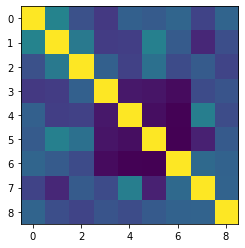

In [23]:

plt.imshow( new_df.corr()  , interpolation = 'nearest' )
plt.show()

convert the new dataframe into a numpy array named "x"

In [ ]:
x = new_df.to_numpy()
x

array([[0.02173913, 0.3212268 , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.47914985, 0.2       , ..., 0.        , 0.        ,
        1.        ],
       [0.2173913 , 0.45843422, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.56201238, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.06521739, 0.26472962, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.93478261, 0.35270379, 0.        , ..., 1.        , 1.        ,
        0.        ]])

get the "charges" column from the previous dataframe and convert it to another numpy array named "y"

In [ ]:
y = cop_data['charges'].to_numpy()
y

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

## Sec 2: Splitting the Data

divide the dataset into two portions in a way that 90% of the data belongs to the "training" set (called `x_train`, `y_train`) and the remaining belongs to the "testing" set (called `x_test`, `y_test`)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

## Sec 3 (Optional): Linear Regression from Scratch

Complete this section with your code.

**hint**: 
- use pseudo inverse if matrix is not invertible.
- you can use `np.linalg`.

**note**:
- do **Phase 3:Sec 4** and **Phase 4:all sections** with this model also, then compare your results. 

In [24]:
class LinearRegression_scratch_without_grad:
    """
    Fits it on data, then use predict to get results.
    """

    def __init__(self):
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        """Fit the training data
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values
        Returns
        -------
        self : object
        """

        n_samples, n_features = X.shape
        

        pinv_X = np.linalg.pinv(X)  
        self.weights = np.dot(pinv_X, y)
        self.bias = y.mean() - np.dot(self.weights.T, X.mean(axis=0))

        return self
    
    def predict(self, X):
        """ Predicts the value after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

In [27]:
class LinearRegression_scratch:
  # because of gradient descent gives more accuracy
    """
    Fits it on data, then use predict to get results.
    """

    def __init__(self):
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        """Fit the training data
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Training samples
        y : array-like, shape = [n_samples, n_target_values]
            Target values
        Returns
        -------
        self : object
        """

        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent algoritm
        lr = 0.01
        num_iterations = 1000
        for i in range(num_iterations):
            y_pred = np.dot(X, self.weights) + self.bias
            self.weights -= lr * ( (1/n_samples) * np.dot(X.T, (y_pred - y)))
            self.bias -= lr * ( (1/n_samples) * np.sum(y_pred - y) )
            
        return self
    
    def predict(self, X):
        """ Predicts the value after the model has been trained.
        Parameters
        ----------
        x : array-like, shape = [n_samples, n_features]
            Test samples
        Returns
        -------
        Predicted value
        """
        
        y_pred = np.dot(X, self.weights) + self.bias
        return y_pred

## Sec 4: The real deal!

fit a linear regressor to the data. (Use both regressors - sklearn & from scratch - if you did previous part)

In [28]:
#scratch
model = LinearRegression_scratch()
model.fit(x_train, y_train)
y_pred_scratch = model.predict(x_test)

In [25]:
#sklearn
from sklearn.linear_model import LinearRegression

regressor = sklearn.linear_model.LinearRegression()
regressor.fit(x_train, y_train)
y_pred_sklearn = regressor.predict(x_test)


In [29]:
# without grad
model_simple = LinearRegression_scratch_without_grad()
model_simple.fit(x_train, y_train)
y_pred_simple = model_simple.predict(x_test)

get the coefficients of the variables

In [33]:
#scratch
print(model.weights)

[ 10272.05659895   7247.28015924   3177.14402457   3562.74003275
   2939.98112367   3923.27253177   2742.24901371 -15557.40424776
    956.4504359 ]


In [34]:
# without grad
print(model_simple.weights)

[ 11924.69966717  12167.70658291   2216.42134494  21945.02110522
  21652.51002791  21108.83492933  21077.20179111 -23930.00940579
    265.3913387 ]


In [35]:
#sklearn
coefficients = regressor.coef_
print(coefficients)

[ 1.19575707e+04  1.22062721e+04  2.14897574e+03 -1.38491896e+17
 -1.38491896e+17 -1.38491896e+17 -1.38491896e+17 -2.39136307e+04
  2.37414096e+02]


get the bias value associated with the model

In [39]:
bias = regressor.intercept_
print(bias)

1.3849189565300869e+17


In [38]:
bias_scratch = model.bias
print(bias_scratch)

13168.242701907862


In [37]:
bias_scratch_without = model_simple.bias
print(bias_scratch_without)

-3.92901711165905e-10


## Sec 5: Save/Load the model

Save

In [40]:
# Save the model
import joblib
joblib.dump(regressor, 'linear_regression_model_sk.joblib')

['linear_regression_model_sk.joblib']

Load

In [41]:
loaded_model = joblib.load('linear_regression_model_sk.joblib')

# Phase 4: Evaluation


predict the value of "y" for each "x" belonging to the "testing" set

In [ ]:
print(y_pred_sklearn)

[ 9280.  7296. 37312.  9504. 27072. 10624.   448. 16864.  1408. 11264.
 28192.  9376.  5184. 38272. 40096. 36960. 15168. 36000.  9088. 31904.
  3776. 10016.  2176.  7232. 11584. 13184. 14592.  6400. 10240.  1824.
  9280. 13312.  4416.  3712.  4288. 12928.  2112.  8960. 33760. 32448.
  4032.  4288. 14272. 11456.  8448. 12000.  5440.  3328. 35392.  8800.
 15808.  2016. 12544.  1440. 13056. 12576.  4320. 32320. 13440. 13120.
 14272. 10368. 16256.  8064. 12096.  4288. 26752. 10720.  2432.  5952.
 10688. 11904. 10944.  8864. 11616.  6720.  7232. 11008.  6528.  8960.
  3392. 36832.  6528. 31168. 34560. 35424.  6720. 12864. 10176. 14336.
 17920. 35456. 33472.  6208. 31840.  9376. 29344.  3584. 28768.  6080.
  5632.  1984. 11136. 14976. 11744.  3936.  9632. 31680.   -96. 33024.
  3072.  9728. 14592. 32000. 11712.  3744. 13120. 32160.  8128.  3232.
  8640. 10560. 15424.  5280.  4032. 10432. 10816. 11136. 14400.  7008.
  5312.  8928.  9280. 12672.]


In [ ]:
print(y_pred_scratch)

[ 9617.4574594   7427.4608442  34893.31480212  9905.16823076
 27132.1069029   8918.79023129  3279.4514886  13631.25828636
  4607.89177002 10849.38979833 29226.30963455  9202.79080151
  7047.26502927 35316.2717672  36517.96305406 34650.01579465
 12891.10749594 33983.6704643  10010.80993937 30983.34752662
  6378.58324123  9651.57799761  4083.1542692   6439.15151761
 11002.98777062 11464.16104965 12374.42809744  7019.2141282
 10176.44246319  4623.26161905  9514.71467244 11573.79719921
  5843.28513977  6209.32831629  5739.99294607 10679.44470726
  4379.67164326  8934.1612318  32704.1711405  31706.27851598
  5918.97792906  5358.82797357 12127.2363161  11070.61109616
  8962.53276581 11556.8462396   5919.1596573   5661.22169999
 33922.22871038  8935.8692624  13850.48162079  4928.32548327
 10070.97107112  3860.91511139 12260.2262886  11414.50501161
  6008.09878088 30907.51797551 11740.14546444 11352.61499898
 12500.85193565  9411.13711159 13867.20912578  8697.04344675
 10855.41413439  5808.906

In [42]:
print(y_pred_simple)

[ 9182.808613    7256.66029251 37418.93125757  9514.01420954
 27136.29460847 10557.08488901   392.92269656 16830.95926056
  1308.10838433 11255.76624816 28280.70413035  9360.59164119
  5200.87951392 38336.04310403 40167.33209783 37035.71811265
 15113.86502304 36101.64002749  9103.71030216 31975.04662691
  3777.42381479  9961.72789791  2133.40058692  7123.06288895
 11593.79904621 13086.11685929 14565.8871257   6377.81378107
 10167.75167119  1820.68937466  9255.72546325 13291.41687319
  4412.15764438  3734.67398009  4260.37191377 12820.02138383
  2051.12987395  8899.98218921 33849.56712217 32516.57545305
  4025.97808495  4240.67613394 14201.38800548 11460.8896505
  8432.19659636 11996.66555972  5436.48370862  3287.18776788
 35469.83391953  8777.94299901 15768.04152539  2011.91192535
 12468.69780956  1342.55373374 13075.87208919 12483.77251061
  4235.65528547 32385.50024877 13392.71616099 13013.47539994
 14263.32042313 10332.48086289 16216.93407632  8050.40268393
 11976.77970635  4288.847

compute the mean squared error

In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_scratch)
print("Mean Squared Error scratch: ", mse)

Mean Squared Error scratch:  35661289.2857056


In [ ]:
mse = mean_squared_error(y_test, y_pred_sklearn)
print("Mean Squared Error sklearn: ", mse)

Mean Squared Error sklearn:  32216909.2710215


In [43]:
mse = mean_squared_error(y_test, y_pred_simple)
print("Mean Squared Error sklearn: ", mse)

Mean Squared Error sklearn:  32275850.35093538


return the coefficient of determination of the prediction

In [45]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_scratch)
print("Coeficient of determination (R^2) scratch: ", r2)

Coeficient of determination (R^2) scratch:  0.6873334087738724


In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_sklearn)
print("Coeficient of determination (R^2) scratch: ", r2)

Coeficient of determination (R^2) sklearn: 0.7664684899657155


In [46]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred_simple)
print("Coeficient of determination (R^2) scratch: ", r2)

Coeficient of determination (R^2) scratch:  0.766041242296501


predict the value of "y" only for the last entry of the "testing" set

In [49]:
x_last = x_test[-1].reshape(1, -1)
y_last_pred = regressor.predict(x_last)
print("Predicted value of y for the last entry sklearn :" ,y_last_pred)

Predicted value of y for the last entry sklearn : [12608.]


In [50]:
x_last = x_test[-1].reshape(1, -1)
y_last_pred = model.predict(x_last)
print("Predicted value of y for the last entry scratch :", y_last_pred)

Predicted value of y for the last entry sklearn : [12512.13209253]


In [52]:
x_last = x_test[-1].reshape(1, -1)
y_last_pred = model_simple.predict(x_last)
print("Predicted value of y for the last entry scratch_without_grad :", y_last_pred)

Predicted value of y for the last entry scratch_without_grad : [12587.83634357]


# Phase 5 (Optional): Submit your predictions to our Kaggle competition

Competition Link: https://www.kaggle.com/t/77b2fa437095401088e51c73956556ff<br>
You'll have to make a csv file containing two columns: `ID` and `charges`, and submit the file.<br>

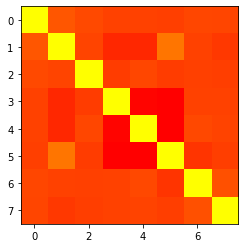

[ 9095.06825  5272.1758  29330.98315  9301.89355 33750.2918   4536.259
  2117.33885 14210.53595  3732.6251  10264.4421  18259.216    7256.7231
  3947.4131  46151.1245  48673.5588  44202.6536   9800.8882  42969.8527
  8233.0975  21774.32215  5080.096    7441.501    1256.299    2755.02095
 11085.5868  10923.9332  12644.589   18804.7524   9715.841    1131.5066
 15828.82173 11842.62375  2020.5523   5693.4305   2904.088    7448.40395
  2597.779    7337.748   23887.6627  38709.176    4687.797    2643.2685
 11674.13    12124.9924   4889.9995  12333.828    3579.8287   4391.652
 42124.5153   4463.2051  13887.204    1719.4363  28476.73499  1708.92575
 10594.2257  25333.33284  3645.0894  38746.3551  11848.141   10564.8845
 13880.949    4753.6368  27941.28758  8017.06115 23045.56616  4133.64165
 17942.106   25992.82104  3594.17085  1682.597    6079.6715   9411.005
  8283.6807   6338.0756   7152.6714   4889.0368   4846.92015 11454.0215
  4349.462    9101.798    1391.5287  28101.33305  5152.134   38

In [53]:
# using ridge regression
# you can use the following libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas
import numpy as np
from joblib import dump, load
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV
import copy
from sklearn.metrics import mean_squared_error
import copy
from sklearn.linear_model import Ridge

dataframe = pandas.read_csv("dataset.csv")
dataframe['rounded_bmi'] = dataframe['bmi'].round()
region_encoded = pandas.get_dummies(dataframe['region'], prefix='region')
smoker_encoded = pandas.get_dummies(dataframe['smoker'], prefix='smoker')
sex_encoded = pandas.get_dummies(dataframe['sex'], prefix='sex')
new_dataframe=pandas.concat([dataframe, region_encoded], axis=1)
new_dataframe = pandas.concat([new_dataframe, smoker_encoded], axis=1)
new_dataframe = pandas.concat([new_dataframe, sex_encoded], axis=1)
new_dataframe.drop(['region'], axis=1, inplace=True)
new_dataframe.drop(['sex'], axis=1, inplace=True)
new_dataframe.drop(['smoker'], axis=1, inplace=True)
scaler = MinMaxScaler()
num_feat = ['age', 'bmi', 'children']
new_dataframe[num_feat] = scaler.fit_transform(new_dataframe[num_feat])

data_cop = copy.deepcopy(new_dataframe)
new_df = data_cop.drop(["rounded_bmi", "charges"], axis=1)
new_df=new_df.drop(["smoker_yes", "sex_male","region_southwest"], axis=1)
plt.imshow( new_df.corr() , cmap = 'autumn' , interpolation = 'nearest' )
plt.show()

x = new_df.to_numpy()
y = data_cop['charges'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

alpha =  1
Ridge_model = Ridge(alpha=alpha)
Ridge_model.fit(x_train, y_train)
y_pred_rid = Ridge_model.predict(x_test)
df = pandas.DataFrame(y_pred_rid)
y_pred_rid = df.values


mse100 = mean_squared_error(y_test, y_pred_rid)
print(y_test)
print(y_pred_rid)
print("Mean Squared Error with alpha=1: ", mse100)
print(np.sqrt(mse100))

arr = np.linspace(0.3, 20, num=500)
param_grid = {'alpha': arr}
grid_search = GridSearchCV(Ridge(), param_grid, cv=10)
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)


dataframe = pandas.read_csv("assignment1-test-data.csv")
dataframe.drop(['ID'], axis=1, inplace=True)
dataframe['rounded_bmi'] = dataframe['bmi'].round()
region_encoded = pandas.get_dummies(dataframe['region'], prefix='region')
smoker_encoded = pandas.get_dummies(dataframe['smoker'], prefix='smoker')
sex_encoded = pandas.get_dummies(dataframe['sex'], prefix='sex')
new_dataframe=pandas.concat([dataframe, region_encoded], axis=1)
new_dataframe = pandas.concat([new_dataframe, smoker_encoded], axis=1)
new_dataframe = pandas.concat([new_dataframe, sex_encoded], axis=1)
new_dataframe.drop(['region'], axis=1, inplace=True)
new_dataframe.drop(['sex'], axis=1, inplace=True)
new_dataframe.drop(['smoker'], axis=1, inplace=True)
scaler = MinMaxScaler()
num_feat = ['age', 'bmi', 'children']
new_dataframe[num_feat] = scaler.fit_transform(new_dataframe[num_feat])

data_cop = copy.deepcopy(new_dataframe)
new_df = data_cop.drop(["rounded_bmi"], axis=1)
new_df=new_df.drop(["smoker_yes", "sex_male","region_southwest"], axis=1)
print(new_df)
x_nn=new_df.to_numpy()
y_pred_fin = Ridge_model.predict(x_nn)

id_arr = np.arange(1, 101)
df = pandas.DataFrame({'charges': y_pred_fin, 'ID': id_arr})
df.to_csv('output89.csv', index=False)

correlation: 
                 age       bmi  children    region  smoker_no  sex_female
age         1.000000  0.109272  0.042469  0.002127   0.025019    0.020856
bmi         0.109272  1.000000  0.012759  0.157566  -0.003750   -0.046371
children    0.042469  0.012759  1.000000  0.016569  -0.007673   -0.017163
region      0.002127  0.157566  0.016569  1.000000   0.002181   -0.004588
smoker_no   0.025019 -0.003750 -0.007673  0.002181   1.000000    0.076185
sex_female  0.020856 -0.046371 -0.017163 -0.004588   0.076185    1.000000


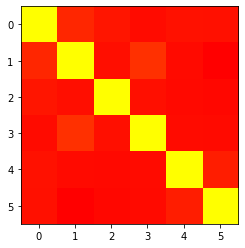

[ 9095.06825  5272.1758  29330.98315  9301.89355 33750.2918   4536.259
  2117.33885 14210.53595  3732.6251  10264.4421  18259.216    7256.7231
  3947.4131  46151.1245  48673.5588  44202.6536   9800.8882  42969.8527
  8233.0975  21774.32215  5080.096    7441.501    1256.299    2755.02095
 11085.5868  10923.9332  12644.589   18804.7524   9715.841    1131.5066
 15828.82173 11842.62375  2020.5523   5693.4305   2904.088    7448.40395
  2597.779    7337.748   23887.6627  38709.176    4687.797    2643.2685
 11674.13    12124.9924   4889.9995  12333.828    3579.8287   4391.652
 42124.5153   4463.2051  13887.204    1719.4363  28476.73499  1708.92575
 10594.2257  25333.33284  3645.0894  38746.3551  11848.141   10564.8845
 13880.949    4753.6368  27941.28758  8017.06115 23045.56616  4133.64165
 17942.106   25992.82104  3594.17085  1682.597    6079.6715   9411.005
  8283.6807   6338.0756   7152.6714   4889.0368   4846.92015 11454.0215
  4349.462    9101.798    1391.5287  28101.33305  5152.134   38

In [ ]:
# best so far
# you can use the following libraries
import pandas
import numpy as np
from joblib import dump, load
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
import copy
from sklearn.metrics import mean_squared_error

#after trying diffrent regularization methods i found that the best one is gradient boosting regressor
#I also tried lasso and ridge but based on dataset it gives more accurate results

dataframe = pandas.read_csv("dataset.csv")
encoder = LabelEncoder()
dataframe['region'] = encoder.fit_transform(dataframe['region'])
dataframe['rounded_bmi'] = dataframe['bmi'].round()
smoker_encoded = pandas.get_dummies(dataframe['smoker'], prefix='smoker')
sex_encoded = pandas.get_dummies(dataframe['sex'], prefix='sex')
new_dataframe = pandas.concat([dataframe, smoker_encoded], axis=1)
new_dataframe = pandas.concat([new_dataframe, sex_encoded], axis=1)
new_dataframe.drop(['sex'], axis=1, inplace=True)
new_dataframe.drop(['smoker'], axis=1, inplace=True)
scaler = MinMaxScaler()
numerical_feat = ['age', 'bmi', 'children']
new_dataframe[numerical_feat] = scaler.fit_transform(new_dataframe[numerical_feat])
data_cop = copy.deepcopy(new_dataframe)
new_df = data_cop.drop(["rounded_bmi", "charges"], axis=1)
new_df=new_df.drop(["smoker_yes", "sex_male"], axis=1)
print("correlation: ")
print(new_df.corr())
plt.imshow( new_df.corr() , cmap = 'autumn' , interpolation = 'nearest' )
plt.show()
x = new_df.to_numpy()
y = data_cop['charges'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
grad_reg = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.1)
grad_reg.fit(x_train, y_train)
y_pred = grad_reg.predict(x_test)
mse100 = mean_squared_error(y_test, y_pred)
print(y_test)
print(y_pred)
print("Mean Squared Error with learning_rate=.1: ", mse100)
print(np.sqrt(mse100))

# after getting diffrent parameters for learning rate and max depth
# best parameters are learning_rate=.1 and max_depth=2 and n_estimators=100
# if I used others parameters I got worse results
# like overfitting

dataframe = pandas.read_csv("assignment1-test-data.csv")
dataframe.drop(['ID'], axis=1, inplace=True)
dataframe['rounded_bmi'] = dataframe['bmi'].round()
encoder = LabelEncoder()
dataframe['region'] = encoder.fit_transform(dataframe['region'])
smoker_encoded = pandas.get_dummies(dataframe['smoker'], prefix='smoker')
sex_encoded = pandas.get_dummies(dataframe['sex'], prefix='sex')
new_dataframe = pandas.concat([dataframe, smoker_encoded], axis=1)
new_dataframe = pandas.concat([new_dataframe, sex_encoded], axis=1)
new_dataframe.drop(['sex'], axis=1, inplace=True)
new_dataframe.drop(['smoker'], axis=1, inplace=True)
scaler = MinMaxScaler()
numerical_feat = ['age', 'bmi', 'children']
new_dataframe[numerical_feat] = scaler.fit_transform(new_dataframe[numerical_feat])
import copy
data_cop = copy.deepcopy(new_dataframe)
new_df = data_cop.drop(["rounded_bmi"], axis=1)
new_df=new_df.drop(["smoker_yes", "sex_male"], axis=1)
print(new_df)
x_nn=new_df.to_numpy()
y_pred_gbr = grad_reg.predict(x_nn)

id_arr = np.arange(1, 101)
df = pandas.DataFrame({'charges': y_pred_gbr, 'ID': id_arr})
df.to_csv('outputnew.csv', index=False)


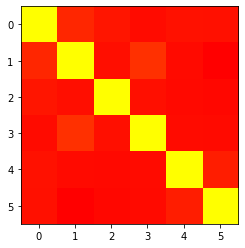

[ 9095.06825  5272.1758  29330.98315  9301.89355 33750.2918   4536.259
  2117.33885 14210.53595  3732.6251  10264.4421  18259.216    7256.7231
  3947.4131  46151.1245  48673.5588  44202.6536   9800.8882  42969.8527
  8233.0975  21774.32215  5080.096    7441.501    1256.299    2755.02095
 11085.5868  10923.9332  12644.589   18804.7524   9715.841    1131.5066
 15828.82173 11842.62375  2020.5523   5693.4305   2904.088    7448.40395
  2597.779    7337.748   23887.6627  38709.176    4687.797    2643.2685
 11674.13    12124.9924   4889.9995  12333.828    3579.8287   4391.652
 42124.5153   4463.2051  13887.204    1719.4363  28476.73499  1708.92575
 10594.2257  25333.33284  3645.0894  38746.3551  11848.141   10564.8845
 13880.949    4753.6368  27941.28758  8017.06115 23045.56616  4133.64165
 17942.106   25992.82104  3594.17085  1682.597    6079.6715   9411.005
  8283.6807   6338.0756   7152.6714   4889.0368   4846.92015 11454.0215
  4349.462    9101.798    1391.5287  28101.33305  5152.134   38

In [54]:
# same as above
# second soloution using RandomForestRegressor and label encoder for ordering region
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
# you can use the following libraries
import pandas
import numpy as np
from joblib import dump, load
from matplotlib import pyplot as plt
import copy
from sklearn.metrics import mean_squared_error
dataframe = pandas.read_csv("dataset.csv")

encoder = LabelEncoder()
dataframe['region'] = encoder.fit_transform(dataframe['region'])
dataframe['rounded_bmi'] = dataframe['bmi'].round()
smoker_encoded = pandas.get_dummies(dataframe['smoker'], prefix='smoker')
sex_encoded = pandas.get_dummies(dataframe['sex'], prefix='sex')
new_dataframe = pandas.concat([dataframe, smoker_encoded], axis=1)
new_dataframe = pandas.concat([new_dataframe, sex_encoded], axis=1)
new_dataframe.drop(['sex'], axis=1, inplace=True)
new_dataframe.drop(['smoker'], axis=1, inplace=True)
scaler = MinMaxScaler()
num_feat = ['age', 'bmi', 'children']
new_dataframe[num_feat] = scaler.fit_transform(new_dataframe[num_feat])

data_cop = copy.deepcopy(new_dataframe)
new_df = data_cop.drop(["rounded_bmi", "charges"], axis=1)
new_df=new_df.drop(["smoker_yes", "sex_male"], axis=1)
plt.imshow( new_df.corr() , cmap = 'autumn' , interpolation = 'nearest' )
plt.show()

x = new_df.to_numpy()
y = data_cop['charges'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

random_forest = RandomForestRegressor(n_estimators=100,max_depth=7, random_state=33)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)



mse100 = mean_squared_error(y_test, y_pred)
print(y_test)
print(y_pred)
print("Mean Squared Error  ", mse100)
print(np.sqrt(mse100))

dataframe = pandas.read_csv("assignment1-test-data.csv")
dataframe.drop(['ID'], axis=1, inplace=True)
dataframe['rounded_bmi'] = dataframe['bmi'].round()
encoder = LabelEncoder()
dataframe['region'] = encoder.fit_transform(dataframe['region'])
smoker_encoded = pandas.get_dummies(dataframe['smoker'], prefix='smoker')
sex_encoded = pandas.get_dummies(dataframe['sex'], prefix='sex')
new_dataframe = pandas.concat([dataframe, smoker_encoded], axis=1)
new_dataframe = pandas.concat([new_dataframe, sex_encoded], axis=1)
new_dataframe.drop(['sex'], axis=1, inplace=True)
new_dataframe.drop(['smoker'], axis=1, inplace=True)
scaler = MinMaxScaler()
num_feat = ['age', 'bmi', 'children']
new_dataframe[num_feat] = scaler.fit_transform(new_dataframe[num_feat])

data_cop = copy.deepcopy(new_dataframe)
new_df = data_cop.drop(["rounded_bmi"], axis=1)
new_df=new_df.drop(["smoker_yes", "sex_male"], axis=1)
print(new_df)
x_nn=new_df.to_numpy()
y_pred_fin = random_forest.predict(x_nn)

id_arr = np.arange(1, 101)
df = pandas.DataFrame({'charges': y_pred_fin, 'ID': id_arr})
df.to_csv('output1.csv', index=False)


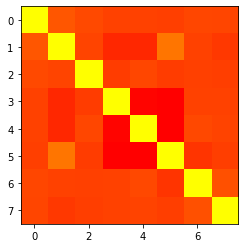

[ 9095.06825  5272.1758  29330.98315  9301.89355 33750.2918   4536.259
  2117.33885 14210.53595  3732.6251  10264.4421  18259.216    7256.7231
  3947.4131  46151.1245  48673.5588  44202.6536   9800.8882  42969.8527
  8233.0975  21774.32215  5080.096    7441.501    1256.299    2755.02095
 11085.5868  10923.9332  12644.589   18804.7524   9715.841    1131.5066
 15828.82173 11842.62375  2020.5523   5693.4305   2904.088    7448.40395
  2597.779    7337.748   23887.6627  38709.176    4687.797    2643.2685
 11674.13    12124.9924   4889.9995  12333.828    3579.8287   4391.652
 42124.5153   4463.2051  13887.204    1719.4363  28476.73499  1708.92575
 10594.2257  25333.33284  3645.0894  38746.3551  11848.141   10564.8845
 13880.949    4753.6368  27941.28758  8017.06115 23045.56616  4133.64165
 17942.106   25992.82104  3594.17085  1682.597    6079.6715   9411.005
  8283.6807   6338.0756   7152.6714   4889.0368   4846.92015 11454.0215
  4349.462    9101.798    1391.5287  28101.33305  5152.134   38

In [ ]:
# used GradientBoostingRegressor with onr hot encoding
# deleted one region for better results

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas
import numpy as np
from joblib import dump, load
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
import copy

dataframe = pandas.read_csv("dataset.csv")
dataframe['rounded_bmi'] = dataframe['bmi'].round()
region_encoded = pandas.get_dummies(dataframe['region'], prefix='region')
smoker_encoded = pandas.get_dummies(dataframe['smoker'], prefix='smoker')
sex_encoded = pandas.get_dummies(dataframe['sex'], prefix='sex')
new_dataframe=pandas.concat([dataframe, region_encoded], axis=1)
new_dataframe = pandas.concat([new_dataframe, smoker_encoded], axis=1)
new_dataframe = pandas.concat([new_dataframe, sex_encoded], axis=1)
new_dataframe.drop(['region'], axis=1, inplace=True)
new_dataframe.drop(['sex'], axis=1, inplace=True)
new_dataframe.drop(['smoker'], axis=1, inplace=True)
scaler = MinMaxScaler()
num_feat = ['age', 'bmi', 'children']
new_dataframe[num_feat] = scaler.fit_transform(new_dataframe[num_feat])
import copy
cop_dat = copy.deepcopy(new_dataframe)
new_df = cop_dat.drop(["rounded_bmi", "charges"], axis=1)
new_df=new_df.drop(["smoker_yes", "sex_male","region_southwest"], axis=1)
plt.imshow( new_df.corr() , cmap = 'autumn' , interpolation = 'nearest' )
plt.show()

x = new_df.to_numpy()
y = cop_dat['charges'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

gbr = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.1)
gbr.fit(x_train, y_train)



gbr.fit(x_train, y_train)
y_pred_rid = gbr.predict(x_test)
df = pandas.DataFrame(y_pred_rid)
y_pred_rid = df.values
from sklearn.metrics import mean_squared_error

mse100 = mean_squared_error(y_test, y_pred_rid)
print(y_test)
print(y_pred_rid)
print("Mean Squared Error : ", mse100)
print(np.sqrt(mse100))


dataframe = pandas.read_csv("assignment1-test-data.csv")
dataframe.drop(['ID'], axis=1, inplace=True)
dataframe['rounded_bmi'] = dataframe['bmi'].round()
region_encoded = pandas.get_dummies(dataframe['region'], prefix='region')
smoker_encoded = pandas.get_dummies(dataframe['smoker'], prefix='smoker')
sex_encoded = pandas.get_dummies(dataframe['sex'], prefix='sex')
new_dataframe=pandas.concat([dataframe, region_encoded], axis=1)
new_dataframe = pandas.concat([new_dataframe, smoker_encoded], axis=1)
new_dataframe = pandas.concat([new_dataframe, sex_encoded], axis=1)
new_dataframe.drop(['region'], axis=1, inplace=True)
new_dataframe.drop(['sex'], axis=1, inplace=True)
new_dataframe.drop(['smoker'], axis=1, inplace=True)
scaler = MinMaxScaler()
num_feat = ['age', 'bmi', 'children']
new_dataframe[num_feat] = scaler.fit_transform(new_dataframe[num_feat])

cop_dat = copy.deepcopy(new_dataframe)
new_df = cop_dat.drop(["rounded_bmi"], axis=1)
new_df=new_df.drop(["smoker_yes", "sex_male","region_southwest"], axis=1)
print(new_df)
x_nn=new_df.to_numpy()
y_pred_finn = gbr.predict(x_nn)

id_arr = np.arange(1, 101)
df = pandas.DataFrame({'charges': y_pred_finn, 'ID': id_arr})
df.to_csv('output3.csv', index=False)

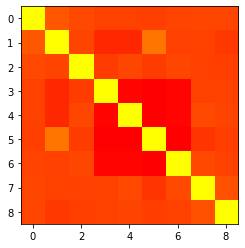

[ 9095.06825  5272.1758  29330.98315  9301.89355 33750.2918   4536.259
  2117.33885 14210.53595  3732.6251  10264.4421  18259.216    7256.7231
  3947.4131  46151.1245  48673.5588  44202.6536   9800.8882  42969.8527
  8233.0975  21774.32215  5080.096    7441.501    1256.299    2755.02095
 11085.5868  10923.9332  12644.589   18804.7524   9715.841    1131.5066
 15828.82173 11842.62375  2020.5523   5693.4305   2904.088    7448.40395
  2597.779    7337.748   23887.6627  38709.176    4687.797    2643.2685
 11674.13    12124.9924   4889.9995  12333.828    3579.8287   4391.652
 42124.5153   4463.2051  13887.204    1719.4363  28476.73499  1708.92575
 10594.2257  25333.33284  3645.0894  38746.3551  11848.141   10564.8845
 13880.949    4753.6368  27941.28758  8017.06115 23045.56616  4133.64165
 17942.106   25992.82104  3594.17085  1682.597    6079.6715   9411.005
  8283.6807   6338.0756   7152.6714   4889.0368   4846.92015 11454.0215
  4349.462    9101.798    1391.5287  28101.33305  5152.134   38

In [ ]:
# final version
# you can use the following libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas
import numpy as np
from joblib import dump, load
from matplotlib import pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
import copy


# I only used given libraries 
# I used one hot encoding with pandas get dummies
# I used min max scaler for noramlization
# after many attempts I used gradient boosting regressor
# it gave great results


dataframe = pandas.read_csv("dataset.csv")
dataframe['rounded_bmi'] = dataframe['bmi'].round()
region_encoded = pandas.get_dummies(dataframe['region'], prefix='region')
smoker_encoded = pandas.get_dummies(dataframe['smoker'], prefix='smoker')
sex_encoded = pandas.get_dummies(dataframe['sex'], prefix='sex')
new_dataframe=pandas.concat([dataframe, region_encoded], axis=1)
new_dataframe = pandas.concat([new_dataframe, smoker_encoded], axis=1)
new_dataframe = pandas.concat([new_dataframe, sex_encoded], axis=1)
new_dataframe.drop(['region'], axis=1, inplace=True)
new_dataframe.drop(['sex'], axis=1, inplace=True)
new_dataframe.drop(['smoker'], axis=1, inplace=True)
scaler = MinMaxScaler()
num_feat = ['age', 'bmi', 'children']
new_dataframe[num_feat] = scaler.fit_transform(new_dataframe[num_feat])
import copy
data_cop = copy.deepcopy(new_dataframe)
new_df = data_cop.drop(["rounded_bmi", "charges"], axis=1)
new_df=new_df.drop(["smoker_yes", "sex_male"], axis=1)
plt.imshow( new_df.corr() , cmap = 'autumn' , interpolation = 'nearest' )
plt.show()

x = new_df.to_numpy()
y = data_cop['charges'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

gradient_reg = GradientBoostingRegressor(max_depth=2, n_estimators=100, learning_rate =.1)
gradient_reg.fit(x_train, y_train)



gradient_reg.fit(x_train, y_train)
y_pred_rid = gradient_reg.predict(x_test)
df = pandas.DataFrame(y_pred_rid)
y_pred_rid = df.values
from sklearn.metrics import mean_squared_error

mse100 = mean_squared_error(y_test, y_pred_rid)
print(y_test)
print(y_pred_rid)
print("Mean Squared Error : ", mse100)
print(np.sqrt(mse100))


dataframe = pandas.read_csv("assignment1-test-data.csv")
dataframe.drop(['ID'], axis=1, inplace=True)
dataframe['rounded_bmi'] = dataframe['bmi'].round()
region_encoded = pandas.get_dummies(dataframe['region'], prefix='region')
smoker_encoded = pandas.get_dummies(dataframe['smoker'], prefix='smoker')
sex_encoded = pandas.get_dummies(dataframe['sex'], prefix='sex')
new_dataframe=pandas.concat([dataframe, region_encoded], axis=1)
new_dataframe = pandas.concat([new_dataframe, smoker_encoded], axis=1)
new_dataframe = pandas.concat([new_dataframe, sex_encoded], axis=1)
new_dataframe.drop(['region'], axis=1, inplace=True)
new_dataframe.drop(['sex'], axis=1, inplace=True)
new_dataframe.drop(['smoker'], axis=1, inplace=True)
scaler = MinMaxScaler()
num_feat = ['age', 'bmi', 'children']
new_dataframe[num_feat] = scaler.fit_transform(new_dataframe[num_feat])

data_cop = copy.deepcopy(new_dataframe)
new_df = data_cop.drop(["rounded_bmi"], axis=1)
new_df=new_df.drop(["smoker_yes", "sex_male"], axis=1)
print(new_df)
x_nn=new_df.to_numpy()
y_pred_final = gradient_reg.predict(x_nn)

id_arr = np.arange(1, 101)
df = pandas.DataFrame({'charges': y_pred_final, 'ID': id_arr})
df.to_csv('outputssss.csv', index=False)

In [ ]:
# we could do better by deleting outlier givving cleaner data for training but the accuracy is pretty great so its enough already :)